<a href="https://colab.research.google.com/github/ArthurAJO/aerospace_engineering_ai_activities/blob/main/secondList/Pattern_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome: Arthur Augusto J de Oliveira\
Matrícula: 2016021645

**Link do notebook deste Google Colab: https://colab.research.google.com/drive/1b99rBtXLqWUVkwj8ft69xJ-r3hqOuTJR#scrollTo=lI-XVwXv03A5**

## 1. Classificação de padrões

Para o exercício de classificação de padrões, o aluno deve utilizar as arquiteturas de rede introduzidas durante a matéria para realizar a classificação entre amostras de duas classes, apresentadas abaixo.

### Arquiteturas de rede a serem desenvolvidas

Para a classificação dos problemas acima, deve-se aplicar as seguintes arquiteturas de rede, tendo seus valores de acurácia e, caso aplicável, o número
de neurônios na camada escondida comparados entre si:

* Perceptron Simples
* ELM
* Perceptron de múltiplas camadas

# Inicialização

Imports e comunicação com o repositório do GitHub que contém o banco de dados para os programas.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

!git clone https://github.com/ArthurAJO/aerospace_engineering_ai_activities.git

fatal: destination path 'aerospace_engineering_ai_activities' already exists and is not an empty directory.


#Funções das arquiteturas de rede.

### Perceptron Simples

Abaixo são construídas as funções para a execução da arquitetura de rede Perceptron Simples.

In [56]:
def trainPerceptron(x,y,eta,tol,max_epocas,par):
    if par == 1:
        bias = np.ones((x.shape[0],1))
        x = np.concatenate((x,bias), axis = 1)
        
    N_perceptron = x.shape[0]
    n_perceptron = x.shape[1]
    w = np.random.rand(n_perceptron) - 0.5 
    w = np.resize(w,(w.shape[0],1))
    n_epocas = 0
    erro_epoca = 1 + tol
    evec = erro_epoca * np.ones(max_epocas)
    
    while erro_epoca > tol and n_epocas < max_epocas - 1:
        e_i2 = 0
        xseq = np.arange(N_perceptron)
        np.random.shuffle(xseq)
        
        for i in range(N_perceptron):
            i_rand = xseq[i]
            yhat_i = np.multiply(np.dot(x[i_rand],w) >= 0, 1)
            e_i = y[i_rand] - yhat_i
            dw = eta * e_i * x[i_rand]
            dw = np.resize(dw,(dw.shape[0],1))
            w = w + dw
            e_i2 = e_i2 + e_i * e_i
        
        n_epocas += 1
        evec[n_epocas] = e_i2/N_perceptron
        erro_epoca = evec[n_epocas]
        
    return w, evec[0:n_epocas]

def yPerceptron(x, w, par):
    if par == 0:
        x = np.concatenate((x,np.ones((x.shape[0],1))), axis = 1)

    w = np.resize(w, (x.shape[1],1))
    y_eval = np.dot(x,w)
    class_eval = np.squeeze(np.multiply(np.dot(x,w) >= 0, 1))
    
    return y_eval, class_eval

### ELM

Abaixo são construídas as funções para a execução da arquitetura de rede ELM.

In [57]:
def trainELMPseudoInverse(x, y, p):
    n = np.shape(x)[1]
    z = np.random.rand(n, p) - 0.5
    z = np.resize(z, (z.shape[0], z.shape[1]))

    for _ in range(maxEpocas):
        h = np.tanh(np.dot(x, z))
        w = np.dot(np.linalg.pinv(h), y)

    return z,w

def yELM(z, w, test):
    w = np.resize(w, (w.shape[0], 1))
    classified_H = np.tanh(np.dot(test, z))
    classified = np.sign(np.tanh(np.dot(classified_H, w)))
    return classified
    
def errorCalc(yEval, actualClass):
    error = np.absolute(actualClass - yEval)
    meanError = np.mean(error)
    stdError = np.std(error)
    accuracy = 1 - meanError
    errorTest = (yEval - actualClass)**2
    errorTest_MS = np.mean(errorTest)

    return accuracy, stdError, errorTest_MS

### Perceptron de múltiplas camadas - MLP (MultiLayer Perceptron)

Abaixo são construídas as funções para a execução da arquitetura de rede Perceptron de múltiplas camadas - MLP (MultiLayer Perceptron).

In [58]:
def activation_y(u):
    return np.tanh(u)

def derivActivation_y(u):
    return (((2/(np.exp(u) + np.exp(-u)))*(2/(np.exp(u) + np.exp(-u)))))

def derivActivation_h(u):
    return (((2/(np.exp(u) + np.exp(-u)))*(2/(np.exp(u) + np.exp(-u)))))

def activation_h(u):
    return np.tanh(u)

def trainMLP(x, y, p, eta, tol, maxEpocas):
    m = y.shape[1]
    n = np.shape(x)[1] 
    N = np.shape(x)[0]
    z = np.matrix(np.random.rand(n+1,p)-0.5)
    w = np.matrix(np.random.rand(p+1,m)-0.5)
    
    xAtual = np.zeros((1, n+1))
    nEpocas = 0
    erroEpoca = tol+1
    evec = [[0]]

    while erroEpoca > tol and nEpocas < maxEpocas - 1:
        ei2 = 0
        xseq = np.arange(N)

        for i in range(N):
            irand = xseq[i]
            xAtual[0,:-1] = x[irand]
            xAtual[0,-1] = 1
            yAtual = y[irand]

            U = np.array(np.dot(xAtual,z), ndmin = 2)
            h_i = activation_h(U)
            hBias = np.append(h_i,[[1]],axis=1)

            yhat_i = np.array(np.dot(hBias, w), ndmin=2)
            yhatClass_i = activation_y(yhat_i)

            e_i = yAtual - yhatClass_i
            flinhaO = derivActivation_y(yhat_i)
            dO= e_i*flinhaO

            wMinus = w[:-1, :]
            eHidden = np.dot(dO, wMinus.T)
            flinhaU = derivActivation_h(U)
            dU = np.multiply(eHidden, flinhaU)

            w = w +eta*np.dot(hBias.T, dO)
            z = z +eta*np.dot(xAtual.T, dU)
            ei2 = ei2 + np.dot(e_i, e_i.T)

        if nEpocas == 0: evec[0] = np.squeeze(ei2/N)
        nEpocas += 1
        evec = np.append(evec, np.squeeze(ei2/N))
        erroEpoca = evec[nEpocas]

    return w, z, evec
    
def yMLP(x, z, w):
  x = np.append(x, np.ones((x.shape[0],1)), axis = 1)
  h_hat = activation_h(np.dot(x,z))
  h_bias = np.append(h_hat, np.ones((h_hat.shape[0], 1)), axis = 1)
  output = np.dot(h_bias, w)
  yEval = activation_y(output)
  
  return yEval

def errorCalc(yEval, actualClass):
    error = np.multiply(actualClass != yEval, 1)
    meanError = np.mean(error)
    stdError = np.std(error)
    accuracy = 1 - meanError
    errorTest = np.dot(error, error.T)
    errorTest_MS = np.mean(errorTest)

    return accuracy, stdError, errorTest_MS

#Execução das tarefas da lista.


## 1.1. Distribuições normais
Duas distribuições normais no espaço R2, com duas variáveis cada, x1 e x2.
As distribuições devem ser caracterizadas como N(μ = (2, 2), σ = 0.4) e
N(μ = (4, 4), σ = 0.4) (a inicialização das classes foi demonstrada durante a
aula).

###1.1.1 Dados para a construção da distribuição normal

Dados para a distribuição normal e construção dos dados para teste e treino.

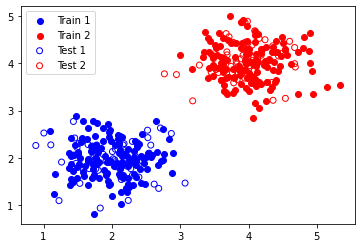

In [99]:
N = 200

# 70% for train and 30% for test
trainSize = int(0.7*N)
testSize = N - trainSize

sigma_1 = 0.4**2
sigma_2 = 0.4**2
mu_1 = 2
mu_2 = 4

mean_1 = [mu_1, mu_1]
cov_1 = [[sigma_1, 0], [0, sigma_1]]

mean_2 = [mu_2, mu_2]
cov_2 = [[sigma_2, 0], [0, sigma_2]]

#Data train
x1_train, y1_train = np.random.multivariate_normal(mean_1, cov_1, trainSize).T
x2_train, y2_train = np.random.multivariate_normal(mean_2, cov_2, trainSize).T

x1_train = np.resize(x1_train, (trainSize, 1))
y1_train = np.resize(y1_train, (trainSize, 1))
x2_train = np.resize(x2_train, (trainSize, 1))
y2_train = np.resize(y2_train, (trainSize, 1))

#Data test
x1_test, y1_test = np.random.multivariate_normal(mean_1, cov_1, testSize).T
x2_test, y2_test = np.random.multivariate_normal(mean_2, cov_2, testSize).T

x1_test = np.resize(x1_test, (testSize, 1))
y1_test = np.resize(y1_test, (testSize, 1))
x2_test = np.resize(x2_test, (testSize, 1))
y2_test = np.resize(y2_test, (testSize, 1))

# PLOT
plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.legend(['Train 1', 'Train 2', 'Test 1', 'Test 2'])
plt.show()

###1.1.2 Perceptron Simples

Definição das clases de treino pro Perceptron e plot do erro médio do modelo.

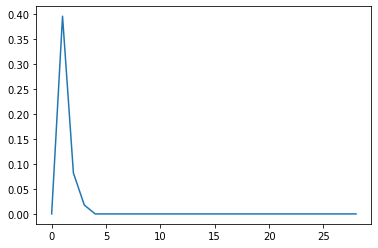

pesos: 
[[ 0.08594913]
 [ 0.01179877]
 [-0.28599033]]


In [100]:
# class train
class_train_1 = 0*np.ones((x1_train.shape[0], 1))
class_train_2 = np.ones((x2_train.shape[0], 1))

class_train = np.concatenate((class_train_1, class_train_2), axis = 0)

# trains
xin_train_1 = np.concatenate((x1_train, y1_train), axis = 1)
xin_train_2 = np.concatenate((x2_train, y2_train), axis = 1)
xin_train_1_2 = np.concatenate((xin_train_1, xin_train_2), axis = 0)

eta = 0.01
tol = -1
max_epocas = 30
consider_bias = 1
wt, evec = trainPerceptron(xin_train_1_2, class_train, eta, tol, max_epocas, consider_bias)

plt.plot(evec)
plt.show()
print("pesos: \n" + str(wt))

Determinação da curva de separação pelo emprego do Perceptron.

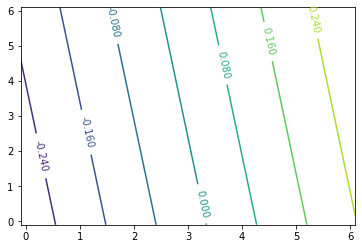

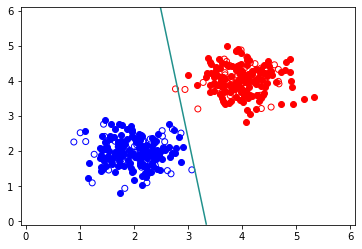

In [101]:
# matrix de pontos xy
xgrid = np.linspace(-0.1, 6.1, 250)
ygrid = np.linspace(-0.1, 6.1, 250)
xygrid = np.zeros((xgrid.shape[0]*ygrid.shape[0], 2))
xMeshGrid, yMeshGrid = np.meshgrid(xgrid, ygrid)
classMeshgrid = np.zeros((xgrid.shape[0], ygrid.shape[0]))

for i, i_pt in enumerate(xgrid):
  for j, j_pt in enumerate(ygrid):
    yd, xyClass = yPerceptron(np.array([j_pt, i_pt], ndmin = 2), wt, 0)
    classMeshgrid[i, j] = yd

###Grid plot
fig, ax = plt.subplots()
CS = ax.contour(xMeshGrid, yMeshGrid, classMeshgrid)
ax.clabel(CS, inline = 1, fontsize = 10)
plt.show()

###Train and test plots with the divider surface.
plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.contour(xMeshGrid, yMeshGrid, classMeshgrid, levels = 0)
plt.show()

###1.1.3 ELM

Determinação das classes de treino e teste para o ELM

In [102]:
# class train
class_train_1 = -1*np.ones((x1_train.shape[0], 1))
class_train_2 = np.ones((x2_train.shape[0], 1))

class_train = np.concatenate((class_train_1, class_train_2), axis = 0)

# trains
xin_train_1 = np.concatenate((x1_train, y1_train), axis = 1)
xin_train_2 = np.concatenate((x2_train, y2_train), axis = 1)
xin_train_1_2 = np.concatenate((xin_train_1, xin_train_2), axis = 0)

bias = np.ones((xin_train_1_2.shape[0], 1))
xin = np.concatenate((xin_train_1_2, bias), axis = 1)

# test
class_test_1 = -1*np.ones((x1_test.shape[0], 1))
class_test_2 = np.ones((x2_test.shape[0], 1))
class_test = np.concatenate((class_test_1, class_test_2))

xin_test_1 = np.concatenate((x1_test, y1_test), axis = 1)
xin_test_2 = np.concatenate((x2_test, y2_test), axis = 1)

test_range = np.concatenate((xin_test_1, xin_test_2), axis = 0)
test_range = np.concatenate((test_range, np.ones((test_range.shape[0], 1))), axis = 1)

Treino da ELM.

In [103]:
maxEpocas = 30
p =3

accuracy_train = []
accuracy_ref = 0

# epoca erro calc
for i in range(maxEpocas):
  np.random.seed(i)
  aux = list(zip(xin, class_train))
  np.random.shuffle(aux)
  xin, class_train = zip(*aux)

  z, wt = trainELMPseudoInverse(xin, class_train, p)

  classified_H = np.tanh(np.dot(test_range, z))
  classified = np.sign(np.tanh(np.dot(classified_H, wt)))

  accuracy, stdError, errorMS = errorCalc(classified, class_test)
  
  if (accuracy > accuracy_ref):
    accuracy_ref = accuracy
    std_ref = stdError
    erroMS_ref = errorMS
    classified_ref = classified
    wt_ref = wt
    z_ref = z

  accuracy_train.append(accuracy)

Classificação dos pontos, determinação das curvas de separação e apresentação de dados de qualidade do método.

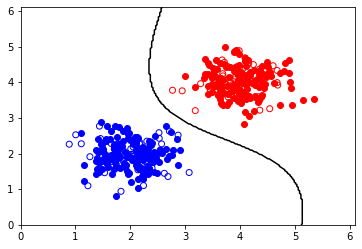

Erro quadrado:     0.0000
Accuracy:     1.0000
Std Error:     0.0000


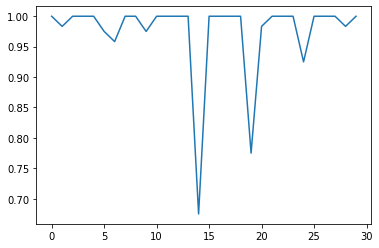

In [104]:
# matrix de pontos xy
xgrid = np.linspace(0, 6.1, 250)
ygrid = np.linspace(0, 6.1, 250)
xygrid = np.zeros((xgrid.shape[0]*ygrid.shape[0], 2))
xMeshGrid, yMeshGrid = np.meshgrid(xgrid, ygrid)

classMeshgrid = np.zeros((xgrid.shape[0], ygrid.shape[0]))

for i, i_pt in enumerate(xgrid):
  for j, j_pt in enumerate(ygrid):
    H = np.tanh(np.dot([j_pt, i_pt, 1], z_ref))
    xyClass = np.sign(np.tanh(np.dot(H, wt_ref)))
    classMeshgrid[i, j] = xyClass

plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.contour(xMeshGrid, yMeshGrid, classMeshgrid, colors=['k'], levels = 0)
plt.show()

#Quality parameters
classified_H = np.tanh(np.dot(test_range, z_ref))
classified = np.sign(np.tanh(np.dot(classified_H, wt_ref)))

accuracy, stdError, errorMS = errorCalc(classified, class_test)
errorTest = (classified - class_test)**2
errorTest_MS = np.mean(errorTest)

print('Erro quadrado: {:10.4f}'.format(errorTest_MS))
print('Accuracy: {:10.4f}'.format(accuracy_ref))
print('Std Error: {:10.4f}'.format(stdError))

plt.plot(accuracy_train)
plt.show()

###1.1.4 Perceptron de múltiplas camadas - MLP (MultiLayer Perceptron)

Determinação das classes de treino e teste para o MLP

In [105]:
xin_train_1 = np.concatenate((x1_train, y1_train), axis = 1)
xin_train_2 = np.concatenate((x2_train, y2_train), axis = 1)
xin_train_1_2 = np.concatenate((xin_train_1, xin_train_2), axis = 0)
xin_train = np.array(xin_train_1_2)

actual_test = np.concatenate((-1*np.ones((testSize, 1)), np.ones((testSize, 1))))
test_1 = np.concatenate((x1_test, y1_test), axis = 1)
test_2 = np.concatenate((x2_test, y2_test), axis = 1)
test_range = np.concatenate((test_1, test_2), axis = 0)

class_train_1 = -1*np.ones((x1_train.shape[0], 1))
class_train_2 = np.ones((x2_train.shape[0], 1))
class_train = np.concatenate((class_train_1, class_train_2), axis = 0)

Execução do método MLP (repetição em 30 vezes para avaliação da acurácia média total).

Há a avaliação do primeiro número ótimo de épocas para se atingir a tolerância desejada.

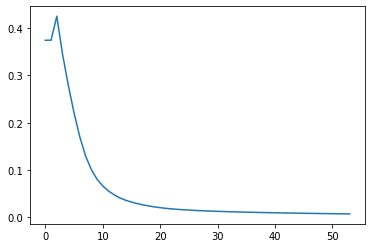

   Acurácia  Desvio Padrão  Erro Médio Quadrático
0  0.991667       0.090906               0.000069
Número de épocas: 55
Número de neuronios: 3
Max epocas:  55
Average accuracy:  0.9916666666666667


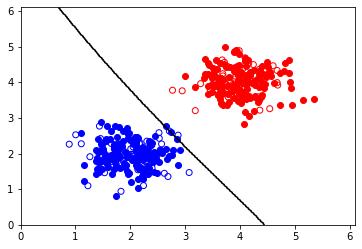

In [106]:
averageAccuracy = 0
accuracyTolerance = 0.99
accuracyMLP=[]
max_epocas = 1
eta = 0.01
p_in = 3
tol = 1e-6
x_train = xin_train
y_train = class_train
test_set = np.array(test_range)
sum = 0

# matrix de pontos xy
xgrid = np.linspace(0, 6.1, 250)
ygrid = np.linspace(0, 6.1, 250)
xygrid = np.zeros((xgrid.shape[0]*ygrid.shape[0], 2))
xMeshGrid, yMeshGrid = np.meshgrid(xgrid, ygrid)
classMeshgrid = np.zeros((xgrid.shape[0], ygrid.shape[0]))

while (averageAccuracy < accuracyTolerance):
    
      wt, zt, erroEpocas = trainMLP(x_train, y_train, p_in, eta, tol, max_epocas)

      # plt.plot(erroEpocas)
      # plt.show()
      # print("Max epocas: ", max_epocas)
            
      yEval = np.sign(np.squeeze(yMLP(test_set, zt, wt))).T
      scores = errorCalc(yEval, actual_test)
      scores = pd.DataFrame(np.array(scores, ndmin = 2), columns = ['Acurácia', 'Desvio Padrão', 'Erro Médio Quadrático'])
      data = scores['Acurácia'].values.tolist()
      # print("scores= ", scores['Acurácia'].values.tolist())
      accuracyMLP= np.append(accuracyMLP,scores['Acurácia'].values.tolist())
      
      # print("accuracyMLP",accuracyMLP)
      # sum = sum + 
      # print("sum", sum)
      averageAccuracy = accuracyMLP[-1]
      # print("Average accuracy: ", averageAccuracy)
      max_epocas += 1

for i, i_pt in enumerate(xgrid):
    for j, j_pt in enumerate(ygrid):
        H = activation_h(np.dot(np.array([j_pt, i_pt, 1]), zt))
        H_bias = np.append(H, [[1]], axis = 1)
        xyClass = np.sign(activation_y(np.dot(H_bias, wt)))
        classMeshgrid[i, j] = xyClass

###
plt.plot(erroEpocas)
plt.show()
print(scores)

print('Número de épocas: ' + str(max_epocas))
print('Número de neuronios: ' + str(p_in))
print("Max epocas: ", max_epocas)
print("Average accuracy: ", averageAccuracy)
plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.contour(xMeshGrid, yMeshGrid, classMeshgrid, colors=['k'], levels = 0)
plt.show()

##1.2 XOR

Utilizar os modelos desenvolvidos anteriormente para classificar o problemas
do ou-exclusivo. Os dados em arquivo .csv serão disponibilizados junto do
enunciado do exercício no moodle.



###1.2.1 Conexão com banco de dados

In [87]:
dataFrameXOR = pd.read_csv('aerospace_engineering_ai_activities/secondList/dataset/xor.csv')
dataFrameXOR = shuffle(dataFrameXOR)

Preparação dos dados: 70% treino e 30% teste.

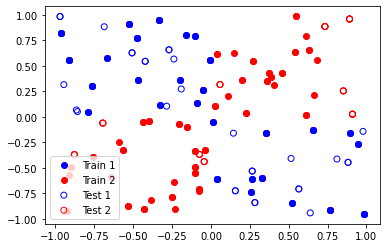

In [88]:
N = len(dataFrameXOR)

# 70% for train and 30% for test
trainSize = int(0.7*N)
testSize = N - trainSize

trainData = dataFrameXOR.head(trainSize)
testDate = dataFrameXOR.tail(testSize)

#Data train
x1_train = trainData[trainData['classes'] == 1]['x.1'].to_numpy()
x1_train = np.resize(x1_train, (trainSize, 1))
y1_train = trainData[trainData['classes'] == 1]['x.2'].to_numpy()
y1_train = np.resize(y1_train, (trainSize, 1))

x2_train = trainData[trainData['classes'] == 2]['x.1'].to_numpy()
x2_train = np.resize(x2_train, (trainSize, 1))
y2_train = trainData[trainData['classes'] == 2]['x.2'].to_numpy()
y2_train = np.resize(y2_train, (trainSize, 1))

#Data test
x1_test = testDate[testDate['classes'] == 1]['x.1'].to_numpy()
x1_test = np.resize(x1_test, (testSize, 1))
y1_test = testDate[testDate['classes'] == 1]['x.2'].to_numpy()
y1_test = np.resize(y1_test, (testSize, 1))

x2_test = testDate[testDate['classes'] == 2]['x.1'].to_numpy()
x2_test = np.resize(x2_test, (testSize, 1))
y2_test = testDate[testDate['classes'] == 2]['x.2'].to_numpy()
y2_test = np.resize(y2_test, (testSize, 1))

# PLOT
plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.legend(['Train 1', 'Train 2', 'Test 1', 'Test 2'])
plt.show()

###1.2.2 Perceptron Simples

Definição das clases de treino pro Perceptron e plot do erro médio do modelo.

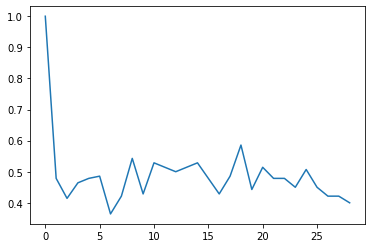

pesos: 
[[ 0.00460575]
 [-0.00196407]
 [ 0.00072948]]


In [89]:
# class train
class_train_1 = 0*np.ones((x1_train.shape[0], 1))
class_train_2 = np.ones((x2_train.shape[0], 1))

class_train = np.concatenate((class_train_1, class_train_2), axis = 0)

# trains
xin_train_1 = np.concatenate((x1_train, y1_train), axis = 1)
xin_train_2 = np.concatenate((x2_train, y2_train), axis = 1)
xin_train_1_2 = np.concatenate((xin_train_1, xin_train_2), axis = 0)

eta = 0.01
tol = 0 #1e-6
max_epocas = 30
consider_bias = 1
wt,evec = trainPerceptron(xin_train_1_2, class_train, eta, tol, max_epocas, consider_bias)

plt.plot(evec)
plt.show()
print("pesos: \n" + str(wt))


Determinação da curva de separação pelo emprego do Perceptron.

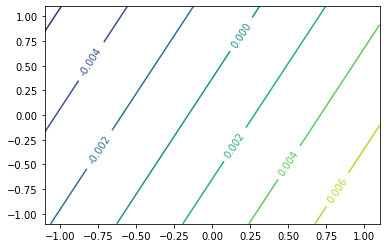

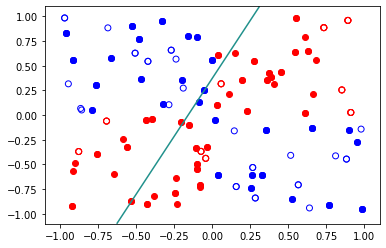

In [90]:
# matrix de pontos xy
xgrid = np.linspace(-1.1, 1.1, 250)
ygrid = np.linspace(-1.1, 1.1, 250)
xygrid = np.zeros((xgrid.shape[0]*ygrid.shape[0], 2))
xMeshGrid, yMeshGrid = np.meshgrid(xgrid, ygrid)

classMeshgrid = np.zeros((xgrid.shape[0], ygrid.shape[0]))

for i, i_pt in enumerate(xgrid):
  for j, j_pt in enumerate(ygrid):
    yd, xyClass = yPerceptron(np.array([j_pt, i_pt], ndmin = 2), wt, 0)
    classMeshgrid[i, j] = yd

###
fig, ax = plt.subplots()
CS = ax.contour(xMeshGrid, yMeshGrid, classMeshgrid)
ax.clabel(CS, inline = 1, fontsize = 10)
plt.show()

###
plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor="none")
plt.scatter(x2_test, y2_test, color='r', facecolor="none")
plt.contour(xMeshGrid, yMeshGrid, classMeshgrid, levels = 0)
plt.show()

###1.2.3 ELM

Determinação das classes de treino e teste para o ELM

In [91]:
# class train
class_train_1 = -1*np.ones((x1_train.shape[0], 1))
class_train_2 = np.ones((x2_train.shape[0], 1))

class_train = np.concatenate((class_train_1, class_train_2), axis = 0)

# trains
xin_train_1 = np.concatenate((x1_train, y1_train), axis = 1)
xin_train_2 = np.concatenate((x2_train, y2_train), axis = 1)
xin_train_1_2 = np.concatenate((xin_train_1, xin_train_2), axis = 0)

bias = np.ones((xin_train_1_2.shape[0], 1))
xin = np.concatenate((xin_train_1_2, bias), axis = 1)

# test
class_test_1 = -1*np.ones((x1_test.shape[0], 1))
class_test_2 = np.ones((x2_test.shape[0], 1))
class_test = np.concatenate((class_test_1, class_test_2))

xin_test_1 = np.concatenate((x1_test, y1_test), axis = 1)
xin_test_2 = np.concatenate((x2_test, y2_test), axis = 1)

test_range = np.concatenate((xin_test_1, xin_test_2), axis = 0)
test_range = np.concatenate((test_range, np.ones((test_range.shape[0], 1))), axis = 1)

Treino da ELM.

In [92]:
maxEpocas = 30
p = 15

accuracy_train = []
accuracy_ref = 0

# epoca erro calc
for i in range(maxEpocas):
  np.random.seed(i)
  aux = list(zip(xin, class_train))
  np.random.shuffle(aux)
  xin, class_train = zip(*aux)

  z, wt = trainELMPseudoInverse(xin, class_train, p)

  classified_H = np.tanh(np.dot(test_range, z))
  classified = np.sign(np.tanh(np.dot(classified_H, wt)))

  accuracy, stdError, errorMS = errorCalc(classified, class_test)
  
  if (accuracy > accuracy_ref):
    accuracy_ref = accuracy
    std_ref = stdError
    erroMS_ref = errorMS
    classified_ref = classified
    wt_ref = wt
    z_ref = z

  accuracy_train.append(accuracy)

Classificação dos pontos, determinação das curvas de separação e apresentação de dados de qualidade do método.

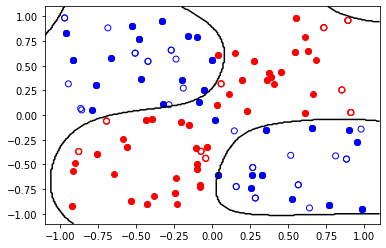

Erro quadrado:     0.0667
Accuracy:     0.9833
Std Error:     0.1280


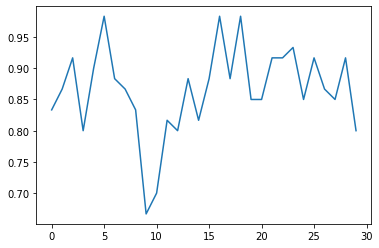

In [93]:
# matrix de pontos xy
xgrid = np.linspace(-1.1, 1.1, 250)
ygrid = np.linspace(-1.1, 1.1, 250)
xygrid = np.zeros((xgrid.shape[0]*ygrid.shape[0], 2))
xMeshGrid, yMeshGrid = np.meshgrid(xgrid, ygrid)

classMeshgrid = np.zeros((xgrid.shape[0], ygrid.shape[0]))

for i, i_pt in enumerate(xgrid):
  for j, j_pt in enumerate(ygrid):
    H = np.tanh(np.dot([j_pt, i_pt, 1], z_ref))
    xyClass = np.sign(np.tanh(np.dot(H, wt_ref)))
    classMeshgrid[i, j] = xyClass

plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.contour(xMeshGrid, yMeshGrid, classMeshgrid, colors=['k'], levels = 0)
plt.show()

#Quality parameters
classified_H = np.tanh(np.dot(test_range, z_ref))
classified = np.sign(np.tanh(np.dot(classified_H, wt_ref)))

accuracy, stdError, errorMS = errorCalc(classified, class_test)
errorTest = (classified - class_test)**2
errorTest_MS = np.mean(errorTest)

print('Erro quadrado: {:10.4f}'.format(errorTest_MS))
print('Accuracy: {:10.4f}'.format(accuracy_ref))
print('Std Error: {:10.4f}'.format(stdError))

plt.plot(accuracy_train)
plt.show()

###1.2.4 Perceptron de múltiplas camadas - MLP (MultiLayer Perceptron)

Determinação das classes de treino e teste para o MLP

In [94]:
xin_train_1 = np.concatenate((x1_train, y1_train), axis = 1)
xin_train_2 = np.concatenate((x2_train, y2_train), axis = 1)
xin_train_1_2 = np.concatenate((xin_train_1, xin_train_2), axis = 0)
xin_train = np.array(xin_train_1_2)

actual_test = np.concatenate((-1*np.ones((testSize, 1)), np.ones((testSize, 1))))
test_1 = np.concatenate((x1_test, y1_test), axis = 1)
test_2 = np.concatenate((x2_test, y2_test), axis = 1)
test_range = np.concatenate((test_1, test_2), axis = 0)

class_train_1 = -1*np.ones((x1_train.shape[0], 1))
class_train_2 = np.ones((x2_train.shape[0], 1))
class_train = np.concatenate((class_train_1, class_train_2), axis = 0)

Execução do método MLP (repetição em 30 vezes para avaliação da acurácia média total).

Há a avaliação do primeiro número ótimo de épocas para se atingir a tolerância desejada.

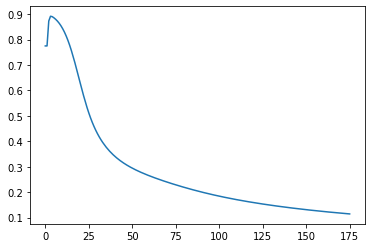

   Acurácia  Desvio Padrão  Erro Médio Quadrático
0       1.0            0.0                    0.0
Número de épocas: 177
Número de neuronios: 6
Max epocas:  177
Average accuracy:  1.0


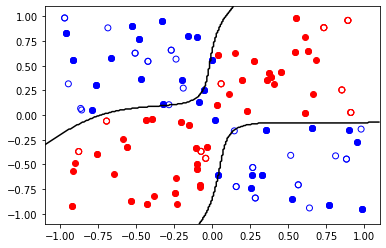

In [98]:
averageAccuracy = 0
accuracyTolerance = 0.99
accuracyMLP=[]
max_epocas = 20
eta = 0.01
p_in = 6
tol = 1e-6
x_train = xin_train
y_train = class_train
test_set = np.array(test_range)
sum = 0

# matrix de pontos xy
xgrid = np.linspace(-1.1, 1.1, 250)
ygrid = np.linspace(-1.1, 1.1, 250)
xygrid = np.zeros((xgrid.shape[0]*ygrid.shape[0], 2))
xMeshGrid, yMeshGrid = np.meshgrid(xgrid, ygrid)
classMeshgrid = np.zeros((xgrid.shape[0], ygrid.shape[0]))

while (averageAccuracy < accuracyTolerance):
    
      wt, zt, erroEpocas = trainMLP(x_train, y_train, p_in, eta, tol, max_epocas)

      # plt.plot(erroEpocas)
      # plt.show()
      # print("Max epocas: ", max_epocas)
            
      yEval = np.sign(np.squeeze(yMLP(test_set, zt, wt))).T
      scores = errorCalc(yEval, actual_test)
      scores = pd.DataFrame(np.array(scores, ndmin = 2), columns = ['Acurácia', 'Desvio Padrão', 'Erro Médio Quadrático'])
      data = scores['Acurácia'].values.tolist()
      # print("scores= ", scores['Acurácia'].values.tolist())
      accuracyMLP= np.append(accuracyMLP,scores['Acurácia'].values.tolist())
      
      # print("accuracyMLP",accuracyMLP)
      # sum = sum + 
      # print("sum", sum)
      averageAccuracy = accuracyMLP[-1]
      # print("Average accuracy: ", averageAccuracy)
      max_epocas += 1

for i, i_pt in enumerate(xgrid):
    for j, j_pt in enumerate(ygrid):
        H = activation_h(np.dot(np.array([j_pt, i_pt, 1]), zt))
        H_bias = np.append(H, [[1]], axis = 1)
        xyClass = np.sign(activation_y(np.dot(H_bias, wt)))
        classMeshgrid[i, j] = xyClass

###
plt.plot(erroEpocas)
plt.show()
print(scores)

print('Número de épocas: ' + str(max_epocas))
print('Número de neuronios: ' + str(p_in))
print("Max epocas: ", max_epocas)
print("Average accuracy: ", averageAccuracy)
plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.contour(xMeshGrid, yMeshGrid, classMeshgrid, colors=['k'], levels = 0)
plt.show()

##1.3 Spirals

Assim como para o problema do ou-exclusivo, utilizar as arquiteturas de
rede aprendidas durante a matéria para realizar o treinamento e separação do
problema das espirais, cujos dados estão também disponibilizados no moodle.



###1.3.1 Conexão com banco de dados

In [76]:
dataFrameSpirals = pd.read_csv('aerospace_engineering_ai_activities/secondList/dataset/spirals.csv')
dataFrameSpirals = shuffle(dataFrameSpirals)

Preparação dos dados: 70% treino e 30% teste.

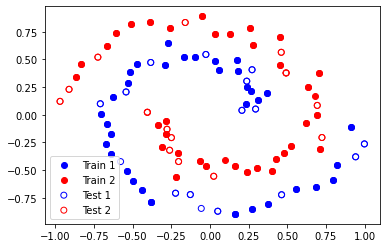

In [77]:
N = len(dataFrameSpirals)

# 70% for train and 30% for test
trainSize = int(0.7*N)
testSize = N - trainSize

trainData = dataFrameSpirals.head(trainSize)
testDate = dataFrameSpirals.tail(testSize)

#Data train
x1_train = trainData[trainData['classes'] == 1]['x.1'].to_numpy()
x1_train = np.resize(x1_train, (trainSize, 1))
y1_train = trainData[trainData['classes'] == 1]['x.2'].to_numpy()
y1_train = np.resize(y1_train, (trainSize, 1))

x2_train = trainData[trainData['classes'] == 2]['x.1'].to_numpy()
x2_train = np.resize(x2_train, (trainSize, 1))
y2_train = trainData[trainData['classes'] == 2]['x.2'].to_numpy()
y2_train = np.resize(y2_train, (trainSize, 1))

#Data test
x1_test = testDate[testDate['classes'] == 1]['x.1'].to_numpy()
x1_test = np.resize(x1_test, (testSize, 1))
y1_test = testDate[testDate['classes'] == 1]['x.2'].to_numpy()
y1_test = np.resize(y1_test, (testSize, 1))

x2_test = testDate[testDate['classes'] == 2]['x.1'].to_numpy()
x2_test = np.resize(x2_test, (testSize, 1))
y2_test = testDate[testDate['classes'] == 2]['x.2'].to_numpy()
y2_test = np.resize(y2_test, (testSize, 1))

# PLOT
plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.legend(['Train 1', 'Train 2', 'Test 1', 'Test 2'])
plt.show()

###1.3.2 Perceptron Simples

Definição das clases de treino pro Perceptron e plot do erro médio do modelo.

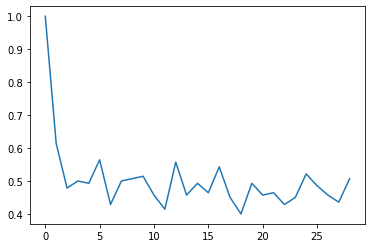

pesos: 
[[0.00431994]
 [0.01254727]
 [0.00521671]]


In [83]:
# class train
class_train_1 = 0*np.ones((x1_train.shape[0], 1))
class_train_2 = np.ones((x2_train.shape[0], 1))

class_train = np.concatenate((class_train_1, class_train_2), axis = 0)

# trains
xin_train_1 = np.concatenate((x1_train, y1_train), axis = 1)
xin_train_2 = np.concatenate((x2_train, y2_train), axis = 1)
xin_train_1_2 = np.concatenate((xin_train_1, xin_train_2), axis = 0)

eta = 0.01
tol = 0 #1e-6
max_epocas = 30
consider_bias = 1
wt,evec = trainPerceptron(xin_train_1_2, class_train, eta, tol, max_epocas, consider_bias)

plt.plot(evec)
plt.show()
print("pesos: \n" + str(wt))


Determinação da curva de separação pelo emprego do Perceptron.

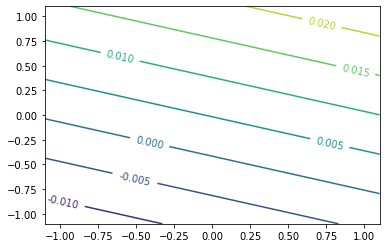

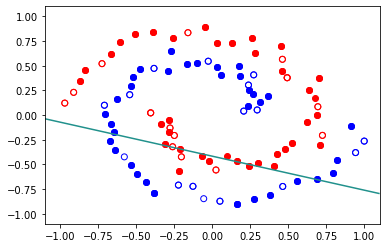

In [84]:
# matrix de pontos xy
xgrid = np.linspace(-1.1, 1.1, 250)
ygrid = np.linspace(-1.1, 1.1, 250)
xygrid = np.zeros((xgrid.shape[0]*ygrid.shape[0], 2))
xMeshGrid, yMeshGrid = np.meshgrid(xgrid, ygrid)

classMeshgrid = np.zeros((xgrid.shape[0], ygrid.shape[0]))

for i, i_pt in enumerate(xgrid):
  for j, j_pt in enumerate(ygrid):
    yd, xyClass = yPerceptron(np.array([j_pt, i_pt], ndmin = 2), wt, 0)
    classMeshgrid[i, j] = yd

###
fig, ax = plt.subplots()
CS = ax.contour(xMeshGrid, yMeshGrid, classMeshgrid)
ax.clabel(CS, inline = 1, fontsize = 10)
plt.show()

###
plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.contour(xMeshGrid, yMeshGrid, classMeshgrid, levels = 0)
plt.show()

###1.3.3 ELM

Determinação das classes de treino e teste para o ELM

In [80]:
# class train
class_train_1 = -1*np.ones((x1_train.shape[0], 1))
class_train_2 = np.ones((x2_train.shape[0], 1))

class_train = np.concatenate((class_train_1, class_train_2), axis = 0)

# trains
xin_train_1 = np.concatenate((x1_train, y1_train), axis = 1)
xin_train_2 = np.concatenate((x2_train, y2_train), axis = 1)
xin_train_1_2 = np.concatenate((xin_train_1, xin_train_2), axis = 0)

bias = np.ones((xin_train_1_2.shape[0], 1))
xin = np.concatenate((xin_train_1_2, bias), axis = 1)

# test
class_test_1 = -1*np.ones((x1_test.shape[0], 1))
class_test_2 = np.ones((x2_test.shape[0], 1))
class_test = np.concatenate((class_test_1, class_test_2))

xin_test_1 = np.concatenate((x1_test, y1_test), axis = 1)
xin_test_2 = np.concatenate((x2_test, y2_test), axis = 1)

test_range = np.concatenate((xin_test_1, xin_test_2), axis = 0)
test_range = np.concatenate((test_range, np.ones((test_range.shape[0], 1))), axis = 1)

Treino da ELM.

In [81]:
maxEpocas = 30
p =20

accuracy_train = []
accuracy_ref = 0

# epoca erro calc
for i in range(maxEpocas):
  np.random.seed(i)
  aux = list(zip(xin, class_train))
  np.random.shuffle(aux)
  xin, class_train = zip(*aux)

  z, wt = trainELMPseudoInverse(xin, class_train, p)

  classified_H = np.tanh(np.dot(test_range, z))
  classified = np.sign(np.tanh(np.dot(classified_H, wt)))

  accuracy, stdError, errorMS = errorCalc(classified, class_test)
  
  if (accuracy > accuracy_ref):
    accuracy_ref = accuracy
    std_ref = stdError
    erroMS_ref = errorMS
    classified_ref = classified
    wt_ref = wt
    z_ref = z

  accuracy_train.append(accuracy)

Classificação dos pontos, determinação das curvas de separação e apresentação de dados de qualidade do método.

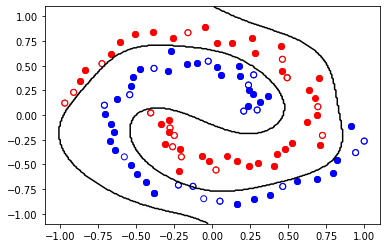

Erro quadrado:     0.1333
Accuracy:     0.9667
Std Error:     0.1795


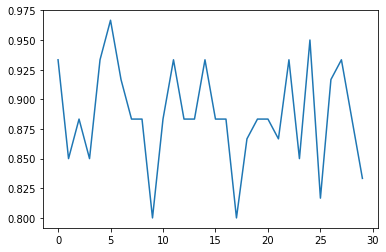

In [82]:
# matrix de pontos xy
xgrid = np.linspace(-1.1, 1.1, 250)
ygrid = np.linspace(-1.1, 1.1, 250)
xygrid = np.zeros((xgrid.shape[0]*ygrid.shape[0], 2))
xMeshGrid, yMeshGrid = np.meshgrid(xgrid, ygrid)

classMeshgrid = np.zeros((xgrid.shape[0], ygrid.shape[0]))

for i, i_pt in enumerate(xgrid):
  for j, j_pt in enumerate(ygrid):
    H = np.tanh(np.dot([j_pt, i_pt, 1], z_ref))
    xyClass = np.sign(np.tanh(np.dot(H, wt_ref)))
    classMeshgrid[i, j] = xyClass

plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.contour(xMeshGrid, yMeshGrid, classMeshgrid, colors=['k'], levels = 0)
plt.show()

#Quality parameters
classified_H = np.tanh(np.dot(test_range, z_ref))
classified = np.sign(np.tanh(np.dot(classified_H, wt_ref)))

accuracy, stdError, errorMS = errorCalc(classified, class_test)
errorTest = (classified - class_test)**2
errorTest_MS = np.mean(errorTest)

print('Erro quadrado: {:10.4f}'.format(errorTest_MS))
print('Accuracy: {:10.4f}'.format(accuracy_ref))
print('Std Error: {:10.4f}'.format(stdError))

plt.plot(accuracy_train)
plt.show()

###1.3.4 Perceptron de múltiplas camadas - MLP (MultiLayer Perceptron)

Determinação das classes de treino e teste para o MLP


In [78]:
xin_train_1 = np.concatenate((x1_train, y1_train), axis = 1)
xin_train_2 = np.concatenate((x2_train, y2_train), axis = 1)
xin_train_1_2 = np.concatenate((xin_train_1, xin_train_2), axis = 0)
xin_train = np.array(xin_train_1_2)

###
actual_test = np.concatenate((-1*np.ones((testSize, 1)), np.ones((testSize, 1))))
test_1 = np.concatenate((x1_test, y1_test), axis = 1)
test_2 = np.concatenate((x2_test, y2_test), axis = 1)
test_range = np.concatenate((test_1, test_2), axis = 0)

###
class_train_1 = -1*np.ones((x1_train.shape[0], 1))
class_train_2 = np.ones((x2_train.shape[0], 1))
class_train = np.concatenate((class_train_1, class_train_2), axis = 0)

Execução do método MLP (repetição em 30 vezes para avaliação da acurácia média total)

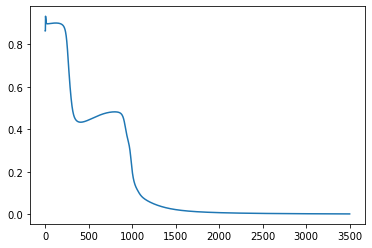

   Acurácia  Desvio Padrão  Erro Médio Quadrático
0  0.883333       0.321023               0.013611
Número de épocas: 3500
Número de neuronios: 6


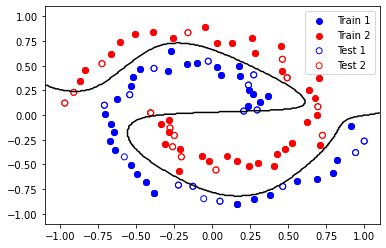

In [79]:
eta = 0.01
max_epocas = 3500
p_in = 6
tol = 1e-6

x_train = xin_train
y_train = class_train

wt, zt, erroEpocas = trainMLP(x_train, y_train, p_in, eta, tol, max_epocas)

plt.plot(erroEpocas)
plt.show()

test_set = np.array(test_range)
yEval = np.sign(np.squeeze(yMLP(test_set, zt, wt))).T
scores = errorCalc(yEval, actual_test)
scores = pd.DataFrame(np.array(scores, ndmin = 2), columns = ['Acurácia', 'Desvio Padrão', 'Erro Médio Quadrático'])
print(scores)

# matrix de pontos xy
xgrid = np.linspace(-1.1, 1.1, 250)
ygrid = np.linspace(-1.1, 1.1, 250)
xygrid = np.zeros((xgrid.shape[0]*ygrid.shape[0], 2))
xMeshGrid, yMeshGrid = np.meshgrid(xgrid, ygrid)
classMeshgrid = np.zeros((xgrid.shape[0], ygrid.shape[0]))

for i, i_pt in enumerate(xgrid):
    for j, j_pt in enumerate(ygrid):
        H = activation_h(np.dot(np.array([j_pt, i_pt, 1]), zt))
        H_bias = np.append(H, [[1]], axis = 1)
        xyClass = np.sign(activation_y(np.dot(H_bias, wt)))
        classMeshgrid[i, j] = xyClass

###
print('Número de épocas: ' + str(max_epocas))
print('Número de neuronios: ' + str(p_in))
plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.legend(['Train 1', 'Train 2', 'Test 1', 'Test 2'])
plt.contour(xMeshGrid, yMeshGrid, classMeshgrid, colors=['k'], levels = 0)
plt.show()